# Define function to return an array of file names

In [1]:
import os

def return_list_of_files(rootdir, printname=False):
    all_files = []

    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            all_files.append(os.path.join(subdir, file))
            if printname: 
                print(os.path.join(subdir, file))
    return np.asarray(all_files)    

# Define function to load data from file names into features + labels

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


def load_data(dataset_path):
    images_list = return_list_of_files(dataset_path)
    
    features = np.ndarray(shape=(len(images_list), 28, 28),
                    dtype=np.uint8)
    labels = []
    for i in range(len(images_list)):
        im = mpimg.imread(images_list[i])
        
        features[i] = im
        labels.append(images_list[i].split("/")[1])
    return features, np.asarray(labels)

In [3]:
features, labels = load_data("TrainingDataAll")

# Pattern 1 - Load both train and test datasets (2 data folders)
## Step 1: Use the loaded data as train datasets

In [4]:
X_train = features
Y_train = labels
print("\n", X_train.shape, "\n", Y_train.shape)


 (64076, 28, 28) 
 (64076,)


## Step 2: Load "Test" data from file names into features + labels

In [6]:
features_test, labels_test = load_data("TestData")

In [7]:
print("\n", features_test.shape, "\n", labels_test.shape)
X_test = features_test
Y_test = labels_test


 (102, 28, 28) 
 (102,)


In [9]:
#Reshape the two-dimentional array (each image information | 28×28 ) to single dimentional array
X_train  = X_train.reshape(64076, 784)
X_test   = X_test.reshape(102, 784)

# Pattern 2 - Split data into train and test datasets (1 data folder)
## Step 1: Label encoder to convert string labels into integers

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(labels)

labels_encoded = le.transform(labels)

## Step 2: Split features and labels into train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

# split the training and testing data
(X_train, X_test, Y_train, Y_test) = train_test_split(features, labels_encoded, test_size=0.2, random_state=1)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(X_train.shape))
print("Test data   : {}".format(X_test.shape))
print("Train labels: {}".format(Y_train.shape))
print("Test labels : {}".format(Y_test.shape))

[STATUS] splitted train and test data...
Train data  : (51260, 28, 28)
Test data   : (12816, 28, 28)
Train labels: (51260,)
Test labels : (12816,)


# Data check

0


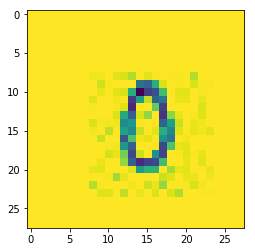

In [6]:
plt.imshow(X_train[3809].reshape(28, 28))
print(Y_train[3809])

5


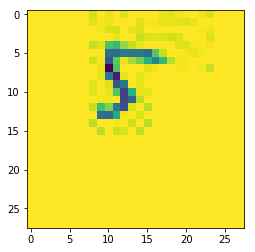

In [7]:
plt.imshow(X_test[100].reshape(28, 28))
print(Y_test[100])

# Train model

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train shape: (51260, 28, 28, 1)
51260 train samples
12816 test samples
Train on 51260 samples, validate on 12816 samples
Epoch 1/12
51260/51260 [==============================] - 70s 1ms/step - loss: 1.4881 - acc: 0.4900 - val_loss: 0.4780 - val_acc: 0.8584
Epoch 2/12
51260/51260 [==============================] - 69s 1ms/step - loss: 0.4622 - acc: 0.8569 - val_loss: 0.2142 - val_acc: 0.9423
Epoch 3/12
51260/51260 [==============================] - 69s 1ms/step - loss: 0.3049 - acc: 0.9066 - val_loss: 0.1654 - val_acc: 0.9522
Epoch 4/12
51260/51260 [==============================] - 69s 1ms/step - loss: 0.2451 - acc: 0.9261 - val_loss: 0.1234 - val_acc: 0.9658
Epoch 5/12
51260/51260 [==============================] - 69s 1ms/step - loss: 0.2069 - acc: 0.9369 - val_loss: 0.1016 - val_acc: 0.9709
Epoch 6/12
51260/51260 [==============================] - 69s 1ms/step - loss: 0.1810 - acc: 0.9454 - val_loss: 0.1358 - val_acc: 0.9578
Epoch 7/12
51260/51260 [==============================]

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Use model to predict on test dataset and print classification report

In [10]:
from sklearn.metrics import classification_report

Y_pred = model.predict_classes(X_test)
print(Y_test[12])
print(Y_pred[12])
Y_pred_ed = keras.utils.to_categorical(Y_pred, 10)

print(classification_report(Y_test, Y_pred_ed))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1717
           1       1.00      0.99      0.99      1187
           2       0.99      0.98      0.98      1237
           3       0.95      0.99      0.97      1185
           4       1.00      0.98      0.99      1479
           5       0.99      0.97      0.98      1243
           6       1.00      0.98      0.99      1280
           7       0.99      0.97      0.98      1262
           8       0.95      0.99      0.97      1089
           9       0.95      0.99      0.97      1137

   micro avg       0.98      0.98      0.98     12816
   macro avg       0.98      0.98      0.98     12816
weighted avg       0.98      0.98      0.98     12816
 samples avg       0.98      0.98      0.98     12816



# Save model

In [11]:
model.save('Keras_Digits_201901181228.h5')